## <font color=darkblue> Introduction to Feed Forward Neural Networks</font>


In this notebook, we provide an **overview of feed forward neural networks**, also known as Multi Layer Perceptrons (MLP) or Dense Neural Networks, which are commonly used in machine/deep learning. 
These networks are very flexible to propose nonlinear models for regression and classification tasks.

In this session we set the focus on these simple networks which allows us to discuss backpropagation of gradient and implementation in keras/pytorch.  This motivates **additional sessions on more complex networks for sequential or strucrured data** with more involved technicalities.

### <font color=darkred> Bibliography & additional ressources </font>

-  [1] Probabilistic machine learning: an introduction, Kevin P. Murphy, 2022, https://probml.github.io/pml-book/book1.html
``Full book online with all basics on machine learning. Not state-of-the-art but very good introduction``
- [2] Deep learning course, Ms. Sc. Institut Polytechnique de Paris, https://github.com/m2dsupsdlclass/lectures-labs


### <font color=darkred>Introduction : general framework & motivations</font>

Parameter inference in machine learning often boils down to solving

\begin{equation*}
\mathrm{argmin}_{\theta \in \mathbb{R}^d} \,\{\ell_n(\theta) + \lambda \mathrm{pen}(\theta)\}\,,
\end{equation*}

with $\lambda>0$, $\mathrm{pen}(\cdot)$ some penalization function and $f$ a ``goodness-of-fit function``  based on a loss $\ell$,

\begin{equation*}
\ell_n(\theta) = \frac 1n \sum_{i=1}^n \ell(\theta,y_i, x_i)\,,
\end{equation*}

 where $(x_i,y_i)_{1\leq i\leq n}$ are ``training examples of inputs and outputs`` (in a supervised setting), and $w$ is an ``unknown parameter to be estimated.``


**Classification**. For instance, in a classification task where $Y_i\in\{1,\ldots, M\}$ and $X_i\in\mathbb{R}^d$, the loglikelihood of the data $\{(X_i,Y_i)\}_{1\leq i\leq n}$ writes:
$$
\log \mathbb{P}_\theta(Y_{1:n} = y_{1:n}| X_{1:n}) = \sum_{i=1}^n \log \mathbb{P}_\theta(Y_{i} = y_i| X_{i})\,,
$$
so that
$$
f:\theta\mapsto -\frac{1}{n}\sum_{i=1}^n \log \mathbb{P}_\theta(Y_{i} = y_i| X_{i})\,.
$$
The only remaining step before training a model and validating the results is to chose a **specific form** for $\mathbb{P}_\theta(Y_{i} = y_i| X_{i})$, $1\leq i \leq n$.  When $Y_i\in\{0,1\}$, the **logistic regression** models the distribution of $Y$ given $X$ as
\begin{equation*}
\mathbb{P}_\theta(Y = 1| X) = \sigma(\langle \theta,X \rangle )\,,
\end{equation*}
where $\theta \in \mathbb{R}^d$ is a vector of model weights, and where $\sigma$ is the sigmoid function. 

$$
\sigma: z \mapsto \frac{1}{1 + e^{-z}}\,.
$$

The common choice when $Y_i\in\{1,\ldots,M\}$ is the **softmax function**: for all $1\leqslant i\leqslant M$
$$
\mathbb{P}_{\theta}(Y_i = k | X_i) = \frac{\mathrm{e}^{\omega_k^TX_i + b_k}}{\sum_{j=1}^M\mathrm{e}^{\omega_j^TX_i + b_j}}\,.
$$
The unknown parameters are $\theta = \{\omega_1,b_1,\ldots,\omega_M,b_L\}$.

The standard approach to estimate the parameters is by maximizing the logarithm of the likelihood i.e. by minimizing the opposite of the normalized loglikelihood:
$$
\ell_n:\theta \mapsto -\frac{1}{n} \sum_{i=1}^n\sum_{k=1}^{M} \mathbb{1}_{Y_i=k}\log \mathbb{P}_{\theta}(Y_i = k | X_i) = -\frac{1}{n} \sum_{i=1}^n\sum_{k=1}^{M} \mathbb{1}_{Y_i=k}\log \frac{\mathrm{e}^{\omega_k^TX_i + b_k}}{\sum_{j=1}^M\mathrm{e}^{\omega_j^TX_i + b_j}}\,.
$$
This can also be written
$$
\ell_n:\theta \mapsto -\frac{1}{n} \sum_{i=1}^n\sum_{k=1}^{M} \mathbb{1}_{Y_i=k}\left(\omega_k^TX_i + b_k - \log \left(\sum_{j=1}^M\mathrm{e}^{\omega_j^TX_i + b_j}\right)\right)\,.
$$
Neural networks offer flexible solutions to introduce more complex nonlinear expressions for $\mathbb{P}_{\theta}(Y_i = k | X_i)$, $1\leq k \leq M$.

**Regression**. In a regression setting, it is assumed that the observations satisfy for all $1\leqslant i \leqslant n$, $Y_i = f_\star(X_i) + \varepsilon_i$ where the $(\varepsilon_i)_{1\leqslant i\leqslant n}$ are i.i.d. centered random variables in $\mathbb{R}^M$, $X_i\in\mathbb{R}^d$ and $f_{\star}$ is an unknown function.  The standard approach to estimate the parameters is by minimizing the mean square error:
$$
\ell_n:\theta \mapsto  \frac{1}{n} \sum_{i=1}^n\left\|f_{\theta}(X_i) - Y_i\right\|^2\,,
$$
where $f_{\theta}$ is a nonlinear parametric function used to estimate the unknown function $f_\star$. In this session we focus on these **regression settings** to explain the backpropagation of gradients. 

## <font color=darkred> Part *I* : Feed Forward Neural Networks </font>

#### Preamble: linear models

In a linear model, we propose to predict the observations using $f_\theta : x \mapsto x^\top \theta$.
For instance, for scalar observations, this means that $Y_i$ is predicted by $X^T_i \theta$.

The penalized least squares estimate of $\theta$ is defined as a solution to

$$
\widehat \theta\in  \mathrm{argmin}_{\theta\in\mathbb{R}^d}\,\left( \|Y - X\theta\|_2^2 + \lambda \|\theta\|_2^2\right)\,,
$$

where $\lambda>0$, $Y = (Y_1,\ldots, Y_n)^\top$ and $X$ is the matrix whose $i$-th row is $X_i^\top$.

The matrix $X^TX + \lambda I_n$ is definite positive for all $\lambda>0$ as for all $u\in\mathbb{R}^d$,

$$
u^T(X^TX + \lambda I_n)u = \|Xu\|_2^2 + \lambda \|u\|_2^2\,,
$$

which is positive for all $u\neq 0$. 

Therefore,  the matrix $X^TX + \lambda I_n$ is invertible for all $\lambda>0$. Using that for all $\lambda>0$,

$$
\nabla \left(\|Y - X\theta\|_2^2 + \lambda \|\theta\|_2^2\right) = 2X^TX\theta - 2X^TY +  2\lambda\theta = 2\left\{\left(X^TX + \lambda I_d\right)\theta -X^TY\right\}\,.
$$

Therefore,

$$
\widehat \theta = \left(X^TX + \lambda I_d\right)^{-1}X^TY\,.
$$

In [ ]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
import pandas as pd
import seaborn as sns

In [ ]:
plt.rcParams.update(
    {
        "font.size": 25,
        "figure.figsize": (14, 7),
        "axes.grid": True,
        "grid.color": "#93a1a1",
        "grid.alpha": 0.3,
        "axes.spines.top": False,
        "axes.spines.right": False,
    }
)

**Observed data**: $Y_k = \sum_{j=1}^d \beta_j X_k(j) + \varepsilon_k$, where $\varepsilon_k$ are i.i.d. $\mathcal{N}(0,\sigma^2)$

In [ ]:
# function to sample a dataset - linear observation model
def sample_data_iid_linear(beta, sigmay, n, d):
    X = np.random.uniform(0, 2 * np.pi, [n,d])
    Y = np.zeros(n)
    eta = np.random.normal(loc=0, scale=1, size=n)
    Y[0] = np.sum(beta * X[0,:]) + sigmay * eta[0]
    for k in range(1,n):
        Y[k] = np.sum(beta * X[k,:]) + sigmay * eta[k]
    return X, Y

**Observed data**: $Y_k = \sum_{j=1}^d \cos(X_k(j)) + \varepsilon_k$, where $\varepsilon_k$ are i.i.d. $\mathcal{N}(0,\sigma^2)$

In [ ]:
# function to sample a dataset - nonlinear observation model
def sample_data_iid_nonlinear(sigmay, n, d):
    X = np.random.uniform(0, 2 * np.pi, [n,d])
    Y = np.zeros(n)
    eta = np.random.normal(loc=0, scale=1, size=n)
    Y[0] = np.sum(np.cos(X[0,:])) + sigmay * eta[0]
    for k in range(1,n):
        Y[k] = np.sum(np.cos(X[k,:])) + sigmay * eta[k]
    return X, Y

In [ ]:
# set parameters
n_train = 1000
n_test = 100
d = 2
sigmay = 0.5
beta = np.random.multivariate_normal(np.zeros(d), np.eye(d))

# sample data  
X_train, Y_train = sample_data_iid_linear(beta, sigmay, n_train, d)
X_test, Y_test = sample_data_iid_linear(beta, sigmay, n_test, d)

In [ ]:
linear_ridge_model = Ridge()
parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1, 2, 3, 4, 5]}
ridge_regressor = GridSearchCV(linear_ridge_model, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, Y_train)
ridge_regressor.best_score_

-0.23879026053318392

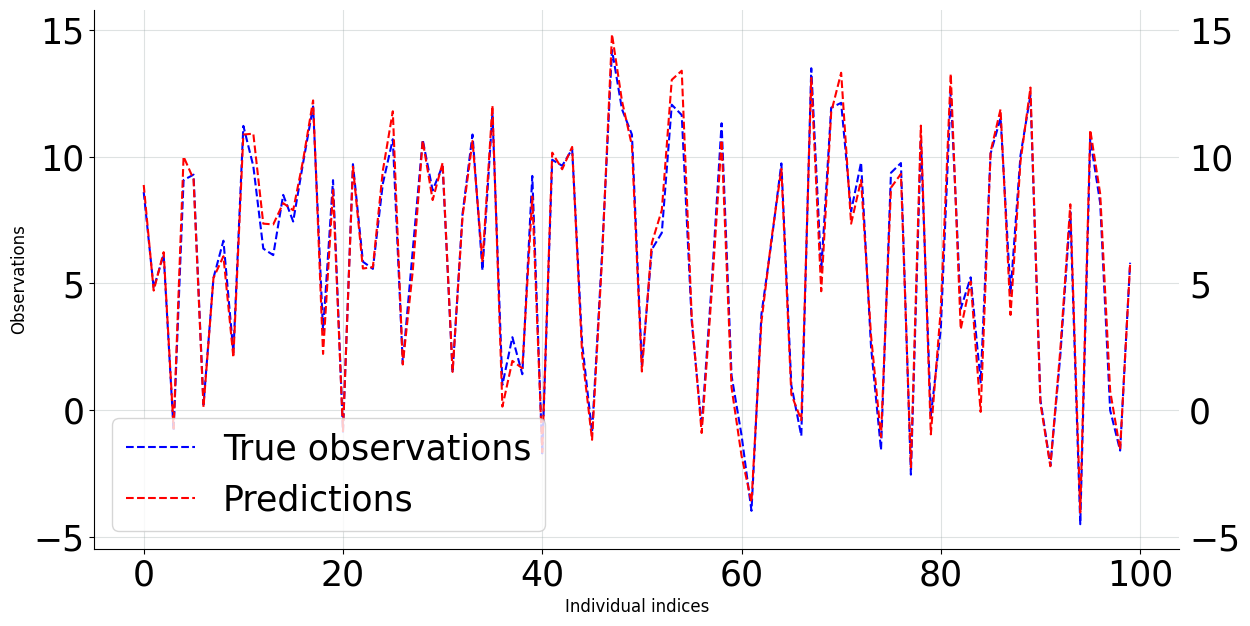

In [ ]:
# plot results
Y_pred_linear = ridge_regressor.predict(X_test)
plt.plot(Y_test,linestyle = "dashed",color="blue", label= "True observations")
plt.plot(Y_pred_linear,linestyle = "dashed",color="red", label="Predictions")
plt.ylabel('Observations', fontsize=12)
plt.xlabel('Individual indices', fontsize=12)
plt.tick_params(labelright=True)
plt.grid('True')
plt.legend();

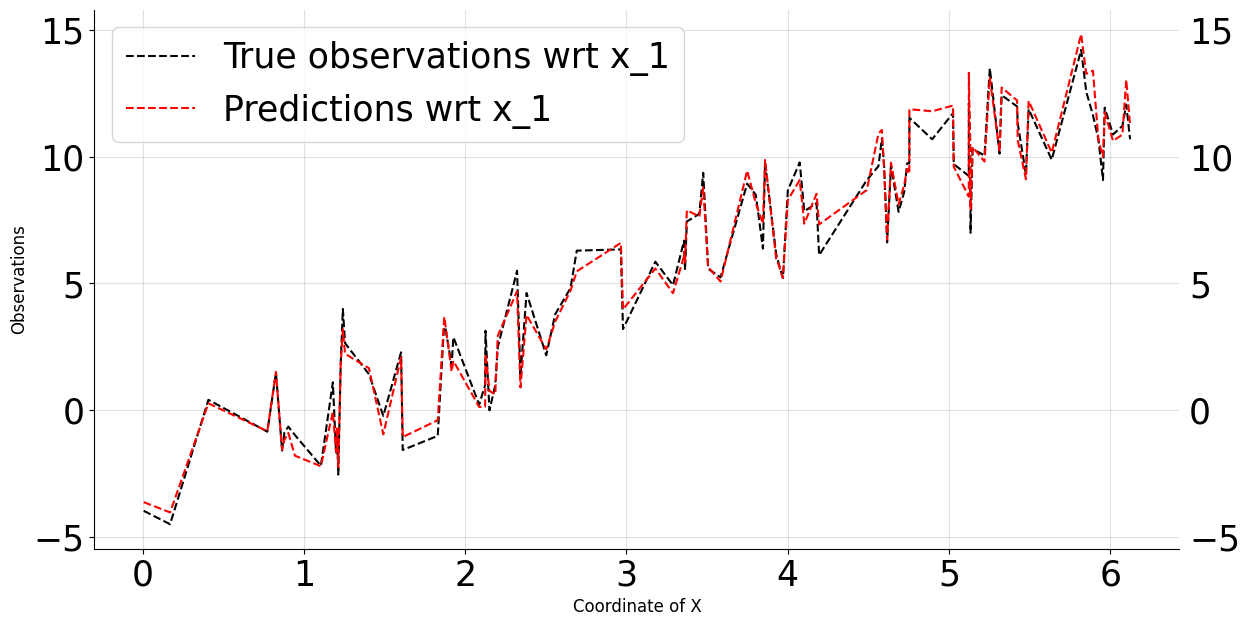

In [ ]:
# plot results
Y_pred_linear = ridge_regressor.predict(X_test)
# with respect to x_1
sort_index = np.argsort(X_test[:,0])
plt.plot(X_test[sort_index,0],Y_test[sort_index],linestyle = "dashed",color="black", label= "True observations wrt x_1")
plt.plot(X_test[sort_index,0],Y_pred_linear[sort_index],linestyle = "dashed",color="red", label="Predictions wrt x_1")
# with respect to x_2
#sort_index = np.argsort(X_test[:,1])
#plt.plot(X_test[sort_index,1],Y_test[sort_index],linestyle = "solid",color="black", label= "True observations wrt x_2")
#plt.plot(X_test[sort_index,1],Y_pred_linear[sort_index],linestyle = "solid",color="red", label="Predictions wrt x_2")
plt.ylabel('Observations', fontsize=12)
plt.xlabel('Coordinate of X', fontsize=12)
plt.tick_params(labelright=True)
plt.grid('True')
plt.legend();

In [ ]:
####
# A compléter
# Effectuer le même travail pour des données tirées avec 
# un modèle non linéaire en utilisant la fonction
# sample_data_iid_nonlinear
####

In this case, the linear model **has very poor performance**. This is no surprise as the observations were generated using a nonlinear transform of the input.

This session is devoted to more complex nonlinear models to transform input data based of **successive combinations of linear and nonlinear transformation of the input**.

#### Multi-layer models

The **Multi-layer Perceptron (MLP)** or **Feed Forward Neural Network (FFNN)** weakens the modeling assumptions of the logistic regression and composed in parallel  $L$ perceptron units to produce the output. Let $x\in\mathbb{R}^d$ be the input and define all layers as follows.

\begin{align*}
h_{\theta}^0(x) &= x\,,\\
\mathrm{Linear\; transform}\qquad z_{\theta}^k(x)  &= b^k + W^kh_{\theta}^{k-1}(x)\quad \mathrm{for\;all\;} 1\leqslant k\leqslant L\,,\\
\mathrm{Nonlinear\; transform}\qquad h_{\theta}^k(x)  &= \varphi_k(z_{\theta}^{k}(x))\quad \mathrm{for\;all\;}1\leqslant k\leqslant L\,,
\end{align*}

where for all $1 \leqslant k \leqslant L$, $b^k\in\mathbb{R}^{d_k}$, $W^k\in\mathbb{R}^{d_k\times d_{k-1}}$, with $d_0 \equiv d$, and $\varphi^k: \mathbb{R}^{d_k} \to \mathbb{R}^{d_k}$ is a nonlinear activation function. 

Let **$\theta = \{b^1,W^1,\ldots,b^L,W^L\}$ be the unknown parameters of the MLP and $f_{\theta}(x) = h_{\theta}^L(x)$** be the output layer of the MLP.

<font color=darkred>**Activation functions**</font>. As there is no modelling assumptions anymore, virtually any activation functions $\varphi^k$, $1 \leqslant k \leqslant L$ may be used. In this section, it is assumed that these intermediate activation functions apply elementwise and, with a minor abuse of notations, we write for all $1 \leqslant k \leqslant L$ and all $z\in\mathbb{R}^{d_m}$,
$$
\varphi^k(z) = (\varphi^k(z_1),\ldots, \varphi^k(z_{d_m}))\,,
$$
with $\varphi^k: \mathbb{R}\to \mathbb{R}$ the seleced scalar activation function. The rectified linear unit (RELU) activation function $x \mapsto \mathrm{max}(0,x)$ and its extensions are the default recommendation in modern implementations  ``(Jarrettet al., 2009; Nair and Hinton, 2010; Glorot et al., 2011a), (Maas et al.,2013),  (He et al., 2015)``. One of the major motivations arise from the gradient based parameter optimization which is numerically more stable with this choice. The choice of the last activation function $\varphi^L$ greatly relies on the task the network is assumed to perform.

- **Biclass classification**. The output $h_{\theta}^L(x)$ is the estimate of the probability that the class is $1$ given the input $x$. The common choice in this case is the sigmoid function. Then, $d_L = 1$ and $h_{\theta}^L(x)$ contains $\mathbb{P}(Y=1 | X)$ and is enough to use as a plug-in Bayes classifier.
$$
\varphi^L(z) =  \frac{\mathrm{e}^{z}}{1 + \mathrm{e}^{z}}\,.
$$
- **Multiclass classification**. The output $h_{\theta}^L(x)$ is the estimate of the probability that the class is  $k$ for all $1\leqslant k\leqslant M$, given the input $x$. The common choice in this case is the softmax function: for all $1\leqslant i\leqslant M$
$$
\varphi^L(z)_i = \mathrm{softmax}(z)_i = \frac{\mathrm{e}^{z_i}}{\sum_{j=1}^M\mathrm{e}^{z_j}}\,.
$$
In this case $d_L = M$ and each component $k$ of $h_{\theta}^L(x)$ contains $\mathbb{P}(Y=k | X)$.
- **Regression**. The output $h_{\theta}^L(x)$ is $f_\theta(x)$. A common choice for the last activation function is the *identity function* i.e, the last transform is only a linear transform.

<font color=darkred>**Training of $\theta$**</font>. For our regression task, the standard approach to estimate the parameters is by maximizing the logarithm of the likelihood i.e. by minimizing the opposite of the normalized loglikelihood:
$$
\ell_n:\theta \mapsto -\frac{1}{n} \sum_{i=1}^n \|Y_i - f_{\theta}(X_i)\|^2\,.
$$

To estimate the unknown parameter $\theta$, we use gradient descent algorithm which amounts to producing recursively parameter estimates using an update of the form: 
$$\theta^{(k+1)} = \theta^{(k)} - \eta_{k+1} \nabla \ell_n(\theta^{(k)})\,.$$ 
Therefore, it is **required to compute $\nabla \ell_n(\theta^{(k)})$ efficiently**.

``Illustration of a layer of a dense network``.

![](https://drive.google.com/uc?export=view&id=1STDEPOohPM6RzR2nERWxnmdMzIq9l_TX)




#### Historical derivation of activation functions

The first  mathematical model for a neuron was the **Threshold Logic Unit** ``(McCulloch and Pitts, 1943)``, with Boolean inputs and outputs. In this setting, the (deterministic) response associated with an input $x\in\{0,1\}^d$ is defined as 
$$
g: x\mapsto \mathbb{1}_{\omega\sum_{j=1}^dx_j + b \geqslant 0}\,.
$$ 
This elementary model can be extended to real valued inputs ``(Rosenblatt, 1957)`` with 
$$
g: x\mapsto \mathbb{1}_{\sum_{j=1}^d\omega_jx_j + b \geqslant 0}\,.
$$
In this case, the nonlinear activation function is $\sigma: x \mapsto \mathbb{1}_{x\geqslant 0}$ and the ouput in $\{0,1\}$ defined as:
$$
g:x \mapsto \sigma(\omega^Tx + b)\,.
$$

**Logistic regression** is another instance with the sigmoid **activation function** $\sigma: x\mapsto \mathrm{e}^x/(1+\mathrm{e}^x)$ and the output $ \sigma(\omega^TX + b)$ in $(0,1)$ is $\mathbb{P}(Y=1 | X)$.


#### Implementation with Keras - Dataset DPE

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Download data
!wget https://gitlab.com/max.cohen/ateliers-algos/-/raw/main/dataset_DPE.csv
df = pd.read_csv("dataset_DPE.csv")
df["DPE_class"] = df["Etiquette_DPE"].apply(
    lambda etiquette: ord(etiquette)-65
)
df

--2023-05-26 11:03:43--  https://gitlab.com/max.cohen/ateliers-algos/-/raw/main/dataset_DPE.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2021731 (1.9M) [text/plain]
Saving to: ‘dataset_DPE.csv.1’

dataset_DPE.csv.1   100%[===================>]   1.93M  2.49MB/s    in 0.8s    

2023-05-26 11:03:44 (2.49 MB/s) - ‘dataset_DPE.csv.1’ saved [2021731/2021731]



,Etiquette_GES,Etiquette_DPE,Année_construction,Hauteur_sous-plafond,Surface_habitable_logement,N°_région_(BAN),Conso_5_usages_é_finale,DPE_class
0,C,D,1945.0,2.9,220.8,27.0,37940.5,3
1,D,D,1948.0,2.5,36.4,11.0,8212.5,3
2,D,D,1948.0,2.5,49.0,53.0,9546.3,3
3,F,G,1947.0,2.5,47.0,11.0,18898.9,6
4,D,D,1948.0,2.5,49.0,53.0,9546.3,3
...,...,...,...,...,...,...,...,...
62788,D,E,1947.0,3.2,241.6,84.0,55134.7,4
62789,A,D,1973.0,2.5,30.6,93.0,2473.8,3
62790,C,G,1948.0,2.5,34.9,28.0,7519.8,6
62791,A,D,1947.0,2.5,51.8,84.0,7221.2,3


In [ ]:
# Select X and y from the dataframe
X = tf.concat(
    [
        df[[
            "Année_construction",
            "Hauteur_sous-plafond",
            "Surface_habitable_logement",
            "N°_région_(BAN)",
        ]].values,
        tf.keras.utils.to_categorical(df["DPE_class"]),
    ],
    axis=1,
)
y = df["Conso_5_usages_é_finale"].values

# Normalize X and y
def normalize(array):
    array_max = tf.reduce_max(array, axis=0)
    array_min = tf.reduce_min(array, axis=0)
    return (array - array_min) / (array_max - array_min)

X = normalize(X)
y = normalize(y)
print(f"X: {X.shape}\ny: {y.shape}")

X: (62793, 11)
y: (62793,)


**Model design**

In [ ]:

#####
# A compléter
# Create a model prone to add layers sequentially
# Add two fully connected layers with ReLU activation, and a linear transform
#####
model = Sequential()
#model.add
#model.add
#model.add
# Chose loss and optimizer for the training
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


**Model training**

Epoch 1/5
12559/12559 [==============================] - 45s 3ms/step - loss: 3.6949e-04
Epoch 2/5
12559/12559 [==============================] - 39s 3ms/step - loss: 1.3382e-04
Epoch 3/5
12559/12559 [==============================] - 39s 3ms/step - loss: 1.2573e-04
Epoch 4/5
12559/12559 [==============================] - 39s 3ms/step - loss: 1.1844e-04
Epoch 5/5
12559/12559 [==============================] - 40s 3ms/step - loss: 1.1614e-04


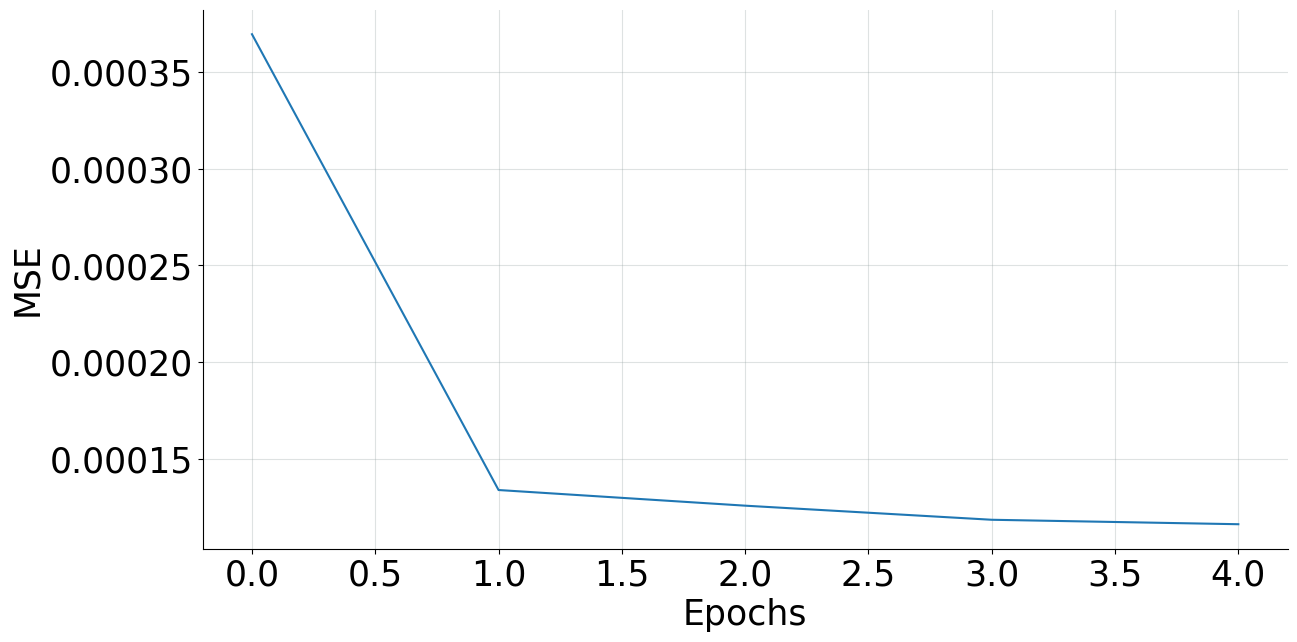

In [ ]:
# Fit the model
history = model.fit(X, y, epochs=5, batch_size=5, verbose=1, shuffle=True)
# Plot loss history
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(history.history["loss"]);

1963/1963 [==============================] - 6s 3ms/step


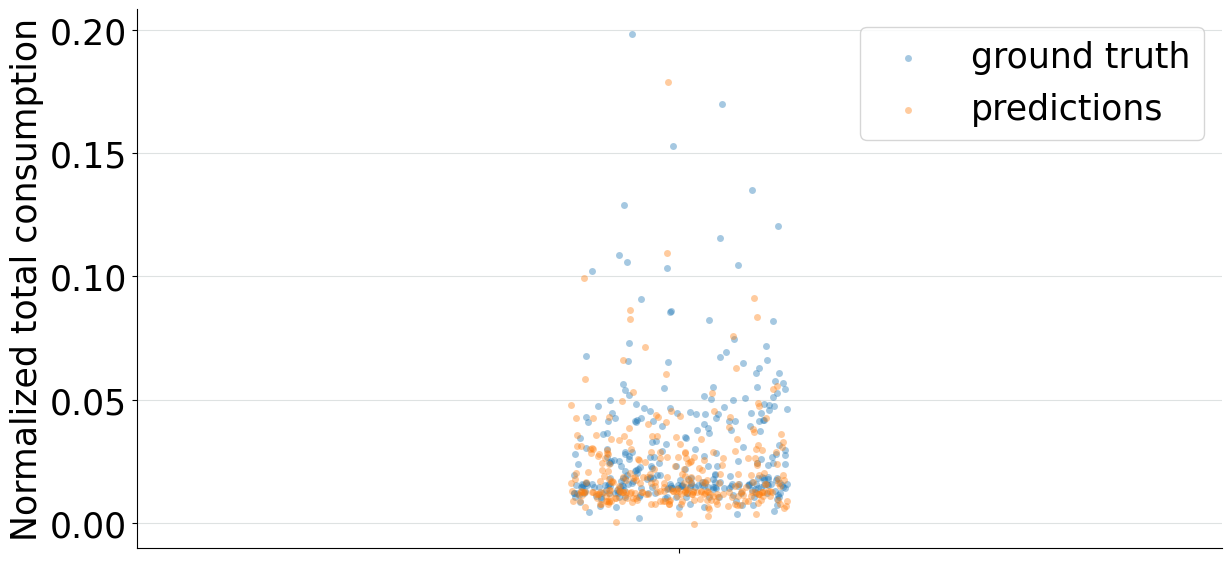

In [ ]:
y_pred = model.predict(X).squeeze()
sns.stripplot(data=y.numpy()[:300], alpha=.4, label="ground truth")
sns.stripplot(data=y_pred[:300], alpha=.4, label="predictions")
plt.ylabel("Normalized total consumption")
plt.legend()

## <font color=darkred> Part *II* : Backpropagation of gradients </font>

#### Rationale

The key ingredient to compute gradients is the **chain rule**.

``Illustration of the chain rule (from IP Paris M2 lecture notes, https://m2dsupsdlclass.github.io/lectures-labs)``.
![](https://drive.google.com/uc?export=view&id=1D_YzkyR-irLjVQVh-MMcoXncrOaghx49)

``Illustration of a forward-backward pass (from IP Paris M2 lecture notes, https://m2dsupsdlclass.github.io/lectures-labs)``.
![](https://drive.google.com/uc?export=view&id=1fcxTHL2wRy0tvI65RnKpo3-_C9qb5ctx)

**Forward pass**: Starting from the input, ans the current value of the parameter, we can compute and store all linear transforms $z_\theta^k(x)$ and nonlinear transforms $h_\theta^k(x)$.


**Backward pass**: Starting from the output $f_\theta(x) = h_\theta^L(x)$, we compute the gradient of the loss function by recursively applying the chain rule, using the quantities computed in the forward pass.



#### Elementary example

Consider the following simplified example to understand the rationale of backpropagation

![](https://drive.google.com/uc?export=view&id=1k5f0MFzN31DIh7DW8ZX4pWE2DJC3rbBO)

$$
\ell_n(\theta) = \frac{1}{2}(\varphi_0(x_0) - d_0)^2 = \frac{1}{2}(\varphi_0(w_4 y_2 + w_5y_3) - d_0)^2\,, 
$$
where
\begin{align*}
z_0 &= \varphi_0(x_0)\,,\\
x_0 &= w_4 y_2 + w_5y_3\,.
\end{align*}
On the other hand, 
\begin{align*}
y_2 &= \varphi_2(x_2)\,,\\
x_2 &= w_2 y_1 + \ldots\,.
\end{align*}
and
\begin{align*}
y_3 &= \varphi_3(x_3)\,,\\
x_2 &= w_3 y_1 + \ldots\,.
\end{align*}



#####**Last layer**

In the last layer, we have 
\begin{align*}
z_0 &= \varphi_0(x_0)\,,\\
x_0 &= w_4 y_2 + w_5y_3\,.
\end{align*}
On the other hand, 
$$
\ell_n(\theta) = \frac{1}{2}(\varphi(x_0) - d_0)^2 = \frac{1}{2}(\varphi(w_4 y_2 + w_5y_3) - d_0)^2 
$$
and 
\begin{align*}
\partial_{w_4}\ell_n(\theta) &=\partial_{w_4}x_0 \cdot \partial_{x_0} \ell_n(\theta)\\
&= \partial_{w_4}x_0 \cdot \partial_{x_0} z_0 \cdot \partial_{z_0} \ell_n(\theta)\\
&= w_4\varphi'(x_0)(z_0-d_0)
\end{align*}

On the other hand, a similar derivation can be performed with $w_5$. 

An important remark is that we **will store the value of $\partial_{x_0} \ell_n(\theta)$ which is required for the derivatives of the parameters in inner layers**.

<font color=darkred> Complete the following computation for $w_5$</font>

\begin{align*}
\partial_{w_5}\ell_n(\theta) &= \partial_{w_5}x_0 \cdot \partial_{x_0} z_0 \cdot \partial_{z_0} \ell_n(\theta)\\
&=\, ...
\end{align*}

#####**Inner layer**

For the inner layer, we can then write
\begin{align*}
\partial_{w_2}\ell_n(\theta) &= \partial_{w_2}x_2 \cdot \partial_{x_2} z_2 \cdot \partial_{z_2} x_0 \partial_{x_0}\ell_n(\theta)\\
&= z_1 \varphi_2'(x_2) w_4 \partial_{x_0}\ell_n(\theta)
\end{align*}
Using the computation of **$\partial_{x_0}\ell_n(\theta)$ obtained during the previous step** yields
\begin{align*}
\partial_{w_2}\ell_n(\theta) &= \partial_{w_2}x_2 \cdot \partial_{x_2} z_2 \cdot \partial_{z_2} x_0 \cdot \partial_{x_0}\ell_n(\theta)\\
&= z_1 \varphi_2'(x_2) w_4 \partial_{x_0}\ell_n(\theta)\\
&= z_1 \varphi'(x_2) w_4 \varphi'(x_0)(z_0-d_0)
\end{align*}

<font color=darkred> Complete the computation for $w_3$</font>

\begin{align*}
\partial_{w_3}\ell_n(\theta) &= \, ...
\end{align*}

#### Complete derivation

Assume here that the last activation function is the identity function. The output is then $h_{\theta}^L(x)= f_{\theta}(x) $ so that it is the prediction of the observation associated with the input $x$.

Write 
$$
\ell_n:\theta \mapsto \frac{1}{n} \sum_{i=1}^n \ell_{\theta}(X_i,Y_i) = \frac{1}{n} \sum_{i=1}^n \|Y_i-f_\theta(X_i)\|^2\,. 
$$

Therefore, **the gradient with respect to all parameters can be computed recursively as follows**.


Then, for all $1\leqslant m\leqslant L-1$,
\begin{align*}
\nabla_{W^m} \ell_{\theta}(X,Y) &= \nabla_{z_{\theta}^m(X)}\ell_{\theta}(X,Y)(h_{\theta}^{m-1}(X))^T\,,\\
\nabla_{b^m} \ell_{\theta}(X,Y) &=  \nabla_{z_{\theta}^m(X)}\ell_{\theta}(X,Y)\,,
\end{align*}
where $\nabla_{z_{\theta}^m(X)}$ is computed recursively as follows.
\begin{align*}
\nabla_{h_{\theta}^m(X)} \ell_{\theta}(X,Y) &= (W^{m+1})^T\nabla_{z_{\theta}^{m+1}(X)} \ell_{\theta}(X,Y) \,,\\
\nabla_{z_{\theta}^m(X)} \ell_{\theta}(X,Y) &= \nabla_{h_{\theta}^m(X)}\ell_{\theta}(X,Y) \odot \varphi_m'(z_{\theta}^{m}(X))\,,
\end{align*}
where $\odot$ is the elementwise multiplication.

All gradients can be computed in two steps.
- In a ``forward pass``, the quantities $z_{\theta}^{m}(X)$ and $h_{\theta}^{m}(X)$ can be computed for all $0\leq m \leq M$.

- In a ``backward pass``, the gradients can be computed recursively, using these quantities and the update formula.



#### Proof

To obtain the recursive formulation of the gradient computations, write, for all $1\leqslant m \leqslant L-1$ and all $1\leqslant j \leqslant d_m$, ,  using that $z_{\theta}^{m+1}(X) = b^{m+1} + W^{m+1}h_{\theta}^{m}(X)$,
\begin{align*}
\partial_{(h_{\theta}^m(X))_j}\ell_{\theta}(X,Y) &=  \sum_{i=1}^{d_{m+1}} \partial_{(z_{\theta}^{m+1}(X))_i}\ell_{\theta}(X,Y)\partial_{(h_{\theta}^m(X))_j}(z_{\theta}^{m+1}(X))_i\,,\\
&=  \sum_{i=1}^{d_{m+1}} \partial_{(z_{\theta}^{m+1}(X))_i}\ell_{\theta}(X,Y)W^{m+1}_{i,j}\,.
\end{align*}
Therefore,
$$
\nabla_{h_{\theta}^m(X)} \ell_{\theta}(X,Y) = (W^{m+1})^T\nabla_{z_{\theta}^{m+1}(X)} \ell_{\theta}(X,Y) \,.
$$
Then, for all $1\leqslant m \leqslant L-1$ and all $1\leqslant j \leqslant d_m$, ,  using that $h_{\theta}^{m}(X)_j =\varphi_m(z_{\theta}^{m}(X)_j)$,
\begin{align*}
\partial_{(z_{\theta}^m(X))_j}\ell_{\theta}(X,Y) &=  \sum_{i=1}^{d_{m+1}} \partial_{(h_{\theta}^m(X))_i}\ell_{\theta}(X,Y)\partial_{(z_{\theta}^m(X))_j}(h_{\theta}^m(X))_i\,,\\
&=  \sum_{i=1}^{d_{m+1}} \partial_{(h_{\theta}^m(X))_i}\ell_{\theta}(X,Y) \mathbb{1}_{i=j}\varphi_m'(z_{\theta}^{m}(X)_i)\,,\\
&= \partial_{(h_{\theta}^m(X))_j}\ell_{\theta}(X,Y) \varphi_m'(z_{\theta}^{m}(X)_j)\,.
\end{align*}
Therefore,
$$
\nabla_{z_{\theta}^m(X)} \ell_{\theta}(X,Y) = \nabla_{h_{\theta}^m(X)}\ell_{\theta}(X,Y) \odot \varphi_m'(z_{\theta}^{m}(X))\,.
$$
Then, for all $1\leqslant i\leqslant d_m$ and all $1\leqslant j \leqslant d_{m-1}$, and using that $z_{\theta}^m(X) = b^m + W^mh_{\theta}^{m-1}(X)$,
\begin{align*}
\partial_{W^m_{i,j}}\ell_{\theta}(X,Y) &=  \sum_{k=1}^{d_m} \partial_{(z_{\theta}^m(X))_k}\ell_{\theta}(X,Y)\partial_{W^m_{i,j}}(z_{\theta}^m(X))_k\,,\\
&=  \sum_{k=1}^{d_m} \partial_{(z_{\theta}^m(X))_k}\ell_{\theta}(X,Y)\mathbb{1}_{i=k}(h_{\theta}^{m-1}(X))_j\,,\\
&=  \partial_{(z_{\theta}^m(X))_i}\ell_{\theta}(X,Y)(h_{\theta}^{m-1}(X))_j\,.
\end{align*}
Therefore,
$$
\nabla_{W^m} \ell_{\theta}(X,Y) = \nabla_{z_{\theta}^m(X)}\ell_{\theta}(X,Y)(h_{\theta}^{m-1}(X))^T\,.
$$
Similarly, for all $1\leqslant i\leqslant d_m$,  using that $z_{\theta}^m(X) = b^m + W^mh_{\theta}^{m-1}(X)$,
\begin{align*}
\partial_{b^m_{i}}\ell_{\theta}(X,Y) &=  \sum_{k=1}^{d_m} \partial_{(z_{\theta}^m(X))_k}\ell_{\theta}(X,Y)\partial_{b^m_{i}}(z_{\theta}^m(X))_k\,,\\
&=  \sum_{k=1}^{d_m} \partial_{(z_{\theta}^m(X))_k}\ell_{\theta}(X,Y)\mathbb{1}_{i=k},\\
&=  \partial_{(z_{\theta}^m(X))_k}\ell_{\theta}(X,Y)_i\,.
\end{align*}
Therefore,
$$
\nabla_{b^m} \ell_{\theta}(X,Y) =  \nabla_{z_{\theta}^m(X)}\ell_{\theta}(X,Y)\,.
$$

#### Implementation from scratch

In [ ]:
# sigmoid and its derivative
def sigmoid(X):
    return 1 / (1 + np.exp(-X))


def dsigmoid(X):
    sig=sigmoid(X)
    return sig * (1 - sig)

We implement a simple neural network with one hidden layer:
\begin{align*}
h_\theta^1(x) &= \sigma(W^hx+b^h)\,,\\
f_\theta(x) &= \sigma(W^o h_\theta^1(x)+b^o)\,,\\
\end{align*}

In [ ]:
class NeuralNet():
    def __init__(self, input_size, hidden_size, output_size):
        self.W_h = np.random.uniform(
            size=(input_size, hidden_size), high=0.01, low=-0.01)
        self.b_h = np.zeros(hidden_size)
        self.W_o = np.random.uniform(
            size=(hidden_size, output_size), high=0.01, low=-0.01)
        self.b_o = np.zeros(output_size)
        self.output_size = output_size

    def forward(self, X, keep_activations=False):
        z_h = np.dot(X, self.W_h) + self.b_h
        h = sigmoid(z_h)
        ####
        # A compléter
        # Effectuer le calcul de z_o et y avec une dernière activation softmax
        #
        #
        ####
        if keep_activations:
            return y, h, z_h
        else:
            return y

    def loss(self, X, y):
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, x, y_true):
        y, h, z_h = self.forward(x, keep_activations=True)
        grad_z_o = y - one_hot(self.output_size, y_true)

        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        #### 
        # A compléter
        # Effectuer le caclul de grad_h, i.e. du gradient de la fonction de coût par rapport à h
        # grad_h =
        ####
        grad_z_h = grad_h * dsigmoid(z_h)
        grad_W_h = np.outer(x, grad_z_h)
        grad_b_h = grad_z_h
        grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # Traditional SGD update on one sample at a time
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

## <font color=darkred> Part III.a : Application to time series prediction</font>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization

In [ ]:
# Download dataset
!wget https://gitlab.com/max.cohen/ateliers-algos/-/raw/main/heating_lilles.csv
df = pd.read_csv('heating_lilles.csv')
df.index = pd.DatetimeIndex(df.datetime) + pd.DateOffset(years=1)
df.sample(5)

--2023-05-23 15:00:13--  https://gitlab.com/max.cohen/ateliers-algos/-/raw/main/heating_lilles.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1406331 (1.3M) [text/plain]
Saving to: ‘heating_lilles.csv’

heating_lilles.csv  100%[===================>]   1.34M  8.06MB/s    in 0.2s    

2023-05-23 15:00:14 (8.06 MB/s) - ‘heating_lilles.csv’ saved [1406331/1406331]



,datetime,outdoor_temperature_deg_celsius,relative_humidity_per_cent,wind_speed_m_per_s,diffuse_horizontal_radiation_Wh_per_m2,direct_normal_radiation_Wh_per_m2,ZONE+00_+00_+00:Zone Operative Temperature [C](Hourly),heating_J,cooling_J,heating_kWh,cooling_kWh,internal_gains_kWh,infiltration_energy_kWh,ventilation_energy_kWh,inside_conduction_energy_kWh,windows_energy_constant_temperature_kWh
datetime,,,,,,,,,,,,,,,,
2021-10-04 04:00:00,2020-10-04 04:00:00,10.30,95.0,5.59,0.0,0.0,17.419023,0.000000e+00,0.0,0.000000,0.0,0.0,-1.064639,0.000000,2.745897,-1.681258
2021-02-23 08:00:00,2020-02-23 08:00:00,5.22,98.0,2.62,59.0,563.1,15.617240,0.000000e+00,0.0,0.000000,0.0,0.0,-2.010689,0.000000,0.442108,1.568581
2021-01-23 05:00:00,2020-01-23 05:00:00,-0.75,98.0,2.83,0.0,0.0,14.999179,3.823474e+07,0.0,10.620761,0.0,0.0,-3.438034,-1.620161,-4.384122,-1.178443
2021-12-13 18:00:00,2020-12-13 18:00:00,6.06,76.0,5.31,0.0,0.0,19.001259,1.002370e+08,0.0,27.843602,0.0,0.0,-3.041877,-10.233357,-21.103256,6.534888
2021-04-27 21:00:00,2020-04-27 21:00:00,8.14,71.0,4.34,0.0,0.0,18.778174,0.000000e+00,0.0,0.000000,0.0,0.0,-2.026326,0.000000,3.263144,-1.236818


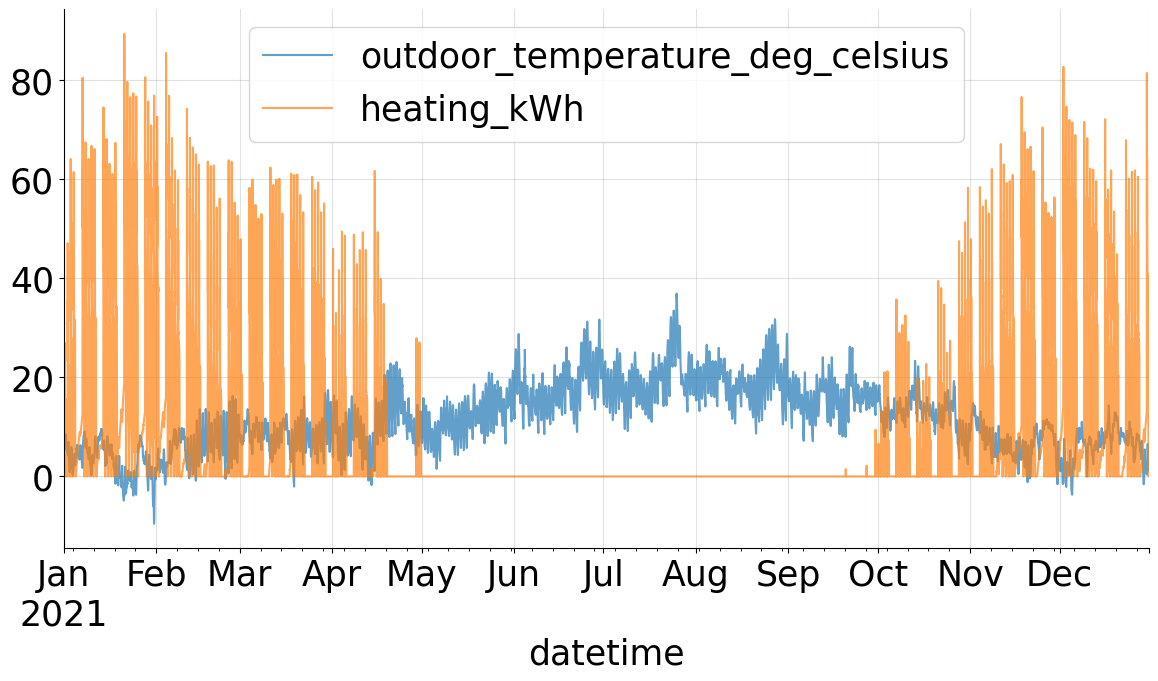

In [ ]:
df.plot(y=["outdoor_temperature_deg_celsius", "heating_kWh"], alpha=0.7);

In [ ]:
# Select cooling period
selection = df[(df.index < datetime.datetime(2019, 4, 18)) | (df.index >= datetime.datetime(2019, 10, 1))].copy()
# Group the data by day
selection["date"] = selection.index.date
selection = selection.groupby("date").agg({"outdoor_temperature_deg_celsius": list, "heating_kWh": list})
# Split the data between a training and an evaluation set.
X = np.stack(selection.outdoor_temperature_deg_celsius.values)
y = np.stack(selection.heating_kWh.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

((291, 24), (73, 24), (291, 24), (73, 24))

In [ ]:
# Define the model
model = Sequential() # Define the model as a sequence of layers
model.add(Normalization(axis=-1)) # Normalize the input data
model.add(Dense(24, input_shape=(24,), activation='relu')) # Specify the input shape
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(24))
model.add(Normalization(axis=-1, invert=True)) # Invert the normalization
# Compile the model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2))

In [ ]:
# Fit the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=16, 
    verbose=0,
    validation_split=0.2,
    shuffle=True
)

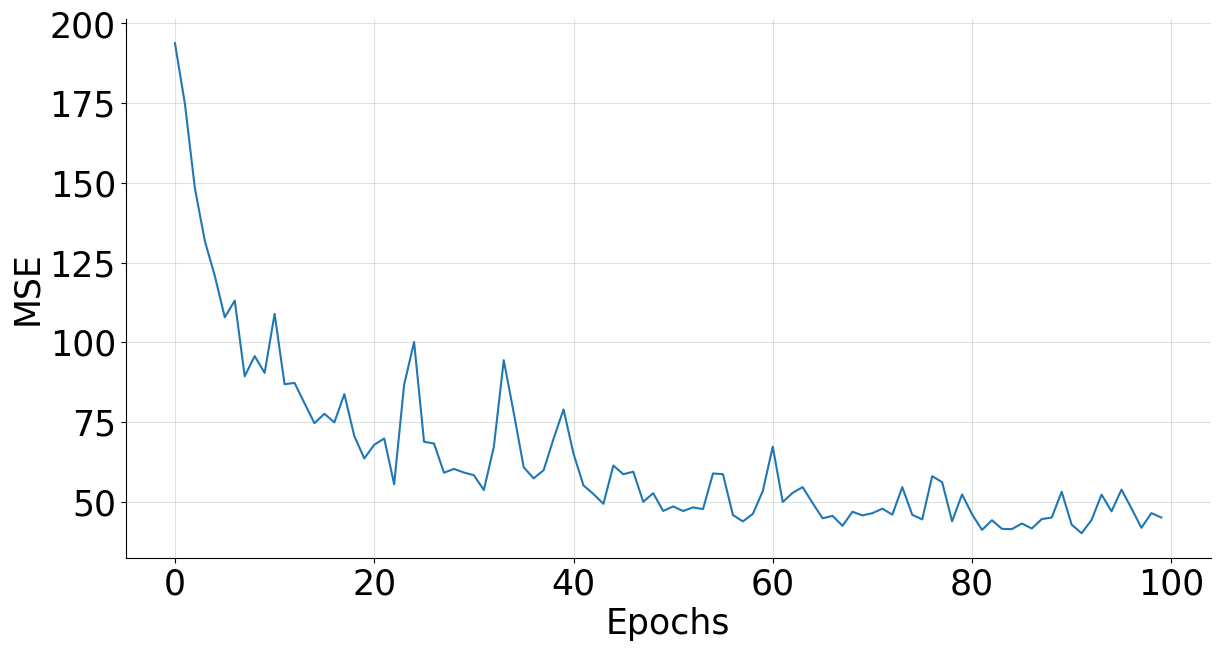

In [ ]:
# Plot loss history
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(history.history["loss"]);

3/3 [==============================] - 0s 4ms/step


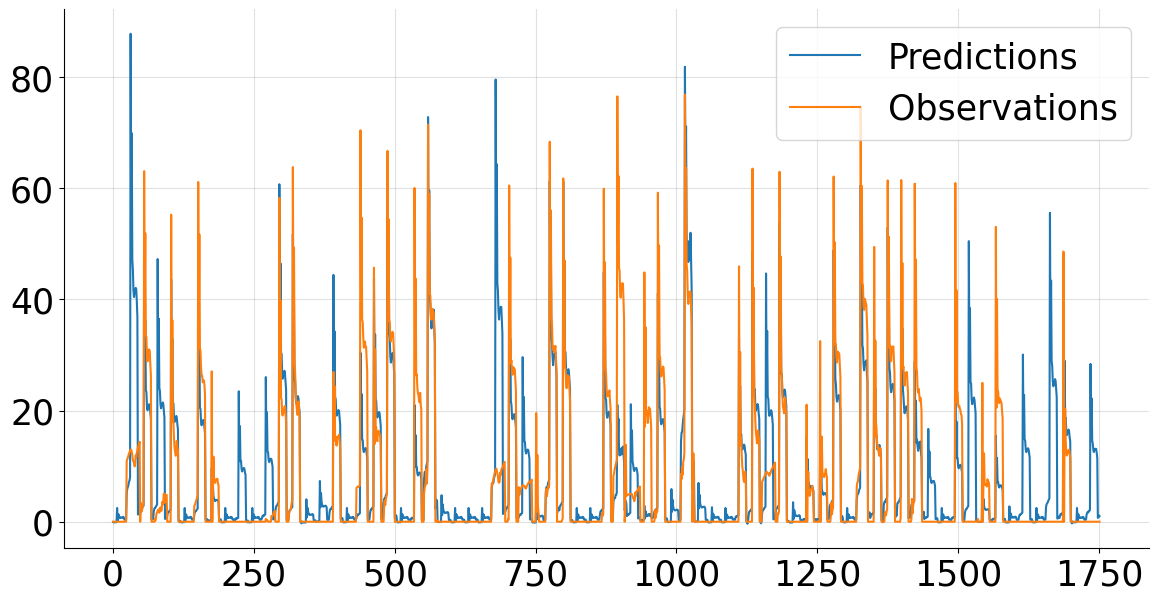

In [ ]:
# Plot predictions over the testing set
y_pred = model.predict(X_test)
plt.plot(y_pred.flatten(), label="Predictions")
plt.plot(y_test.flatten(), label="Observations")
plt.legend();

In [ ]:
###
# A compléter
# 1 - Créer un modèle avec deux puis trois couches intermédiares 
# 2 - Comparer les performances de ces modèles
###

## <font color=darkred> Part III.b : Application to DPE classification</font>

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

plt.rcParams.update(
    {
        "font.size": 25,
        "figure.figsize": (14, 7),
        "axes.grid": True,
        "grid.color": "#93a1a1",
        "grid.alpha": 0.3,
        "axes.spines.top": False,
        "axes.spines.right": False,
    }
)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")

Using device cpu.


In [ ]:
# Download data
!wget https://gitlab.com/max.cohen/ateliers-algos/-/raw/main/dataset_DPE.csv

--2023-05-12 11:21:32--  https://gitlab.com/max.cohen/ateliers-algos/-/raw/main/dataset_DPE.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2021731 (1.9M) [text/plain]
Saving to: ‘dataset_DPE.csv’

dataset_DPE.csv     100%[===================>]   1.93M  6.38MB/s    in 0.3s    

2023-05-12 11:21:33 (6.38 MB/s) - ‘dataset_DPE.csv’ saved [2021731/2021731]



In [ ]:
# Load data in a dataframe
df = pd.read_csv("dataset_DPE.csv")[:10000]
df

,Etiquette_GES,Etiquette_DPE,Année_construction,Hauteur_sous-plafond,Surface_habitable_logement,N°_région_(BAN),Conso_5_usages_é_finale
0,C,D,1945.0,2.9,220.8,27.0,37940.5
1,D,D,1948.0,2.5,36.4,11.0,8212.5
2,D,D,1948.0,2.5,49.0,53.0,9546.3
3,F,G,1947.0,2.5,47.0,11.0,18898.9
4,D,D,1948.0,2.5,49.0,53.0,9546.3
...,...,...,...,...,...,...,...
9995,B,D,2006.0,2.5,19.1,84.0,1971.9
9996,D,D,1830.0,2.5,109.0,28.0,5823.6
9997,D,G,1947.0,2.6,18.8,11.0,7675.7
9998,B,D,1994.0,2.5,16.5,11.0,1629.5


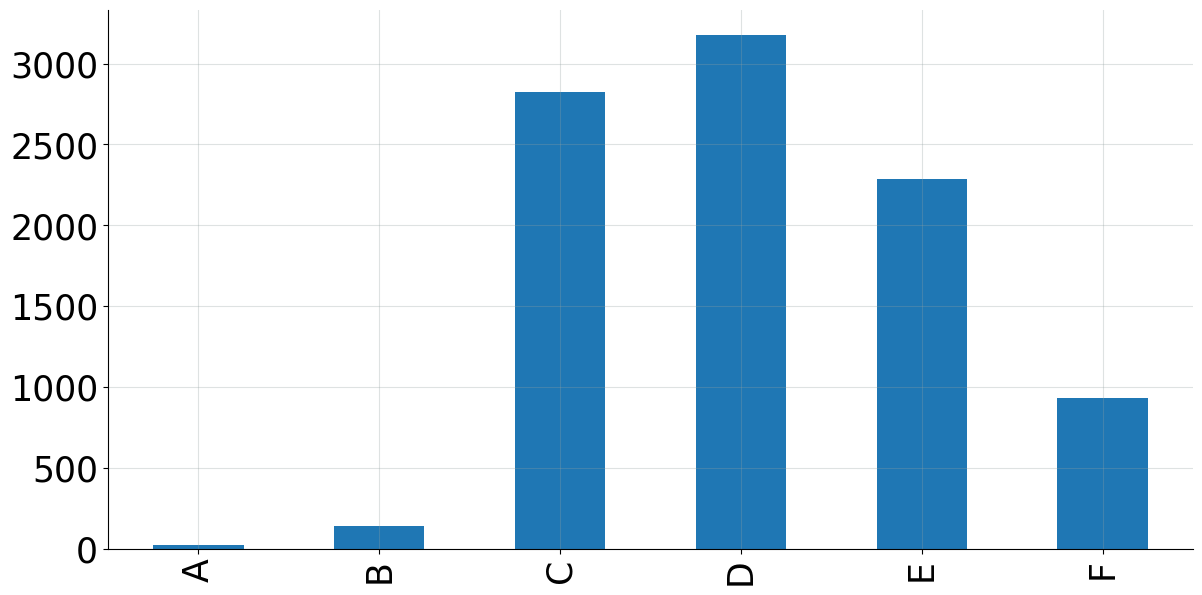

In [ ]:
# Visualize the DPE notation distribution in the dataset
df["Etiquette_DPE"].value_counts().loc[['A', 'B', 'C', 'D', 'E', 'F']].plot(kind="bar");

In [ ]:
class DatasetDPE(Dataset):
    """Torch Dataset for preprocessing and accessing the dataframe.

    In the ``__init__`` function, we preprocess the dataframe by
     - converting DPE notations to numeric classes
     - storing input variables and targets to tensors
     - normalizing the input tensor

    The two additionnal ``__len__`` and ``__getitem__`` functions allows for
    accessing samples of the dataset, and are used by the Torch Dataloaders.
    """
    def __init__(self, df: pd.DataFrame):
        super().__init__()
        # Use a numeric classification for DPE (i.e. A, B, C -> 0, 1, 2)
        df["DPE_class"] = df["Etiquette_DPE"].apply(
            lambda etiquette: ord(etiquette)-65
        )
        # Convert columns to input tensors X and target y
        self.X = torch.tensor(df[[
            'Année_construction',
            'Hauteur_sous-plafond',
            'N°_région_(BAN)',
            'Surface_habitable_logement',
            'Conso_5_usages_é_finale',
        ]].values, dtype=torch.float32)
        self.y = torch.tensor(df["DPE_class"].values, dtype=torch.long)
        # Normalize input data
        self.X = (self.X - self.X.min(axis=0)[0]) / (self.X.max(axis=0)[0] - self.X.min(axis=0)[0])
        
    def __len__(self) -> int:
        return len(self.X)
    
    def __getitem__(self, idx: int) -> tuple[torch.tensor]:
        return (self.X[idx], self.y[idx])
  
# Instantiate the dataset
dataset = DatasetDPE(df)
# Setup a dataloader, specify the batch size
dataloader = DataLoader(dataset, batch_size=16, num_workers=2, shuffle=True)

In [ ]:
# We define a model with a hidden state and a ReLU non linearity
num_hidden = 16
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=5, out_features=num_hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=num_hidden, out_features=len(df["DPE_class"].unique())),
).to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

##### <font color=darkred> Model training</font>

In [ ]:
epochs = 50
hist_loss = []
# Iterate through the epochs
for _ in tqdm.tqdm(range(epochs)):
    running_loss = 0
    # Iterate through each training sample in the dataset
    for X, y in dataloader:
        # Move X and y to the device
        X = X.to(device)
        y = y.to(device)
        # Compute the prediction error
        loss = loss_function(model(X), y)
        # Backpropagate the error
        optimizer.zero_grad()
        loss.backward()
        # Run one gradient step
        optimizer.step()
        # Log the current error
        running_loss += loss.item()
    hist_loss.append(running_loss / len(dataloader))

100%|██████████| 50/50 [01:33<00:00,  1.88s/it]


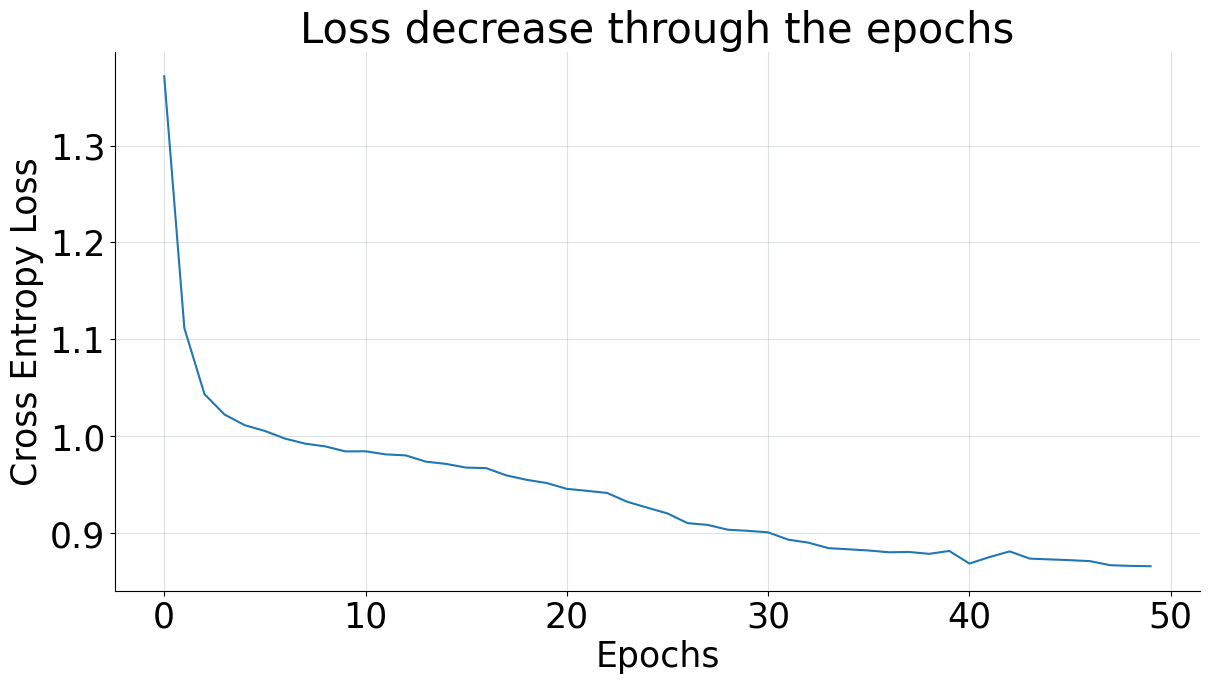

In [ ]:
plt.title("Loss decrease through the epochs")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.plot(hist_loss);

In [ ]:
# Compute the accuracy on the entire dataset
accuracy = 0
for X, y in dataloader:
    # Move X and y to device
    X = X.to(device)
    y = y.to(device)
    with torch.no_grad(): 
        prediction = torch.nn.functional.softmax(
            model(X), dim=-1
        ).argmax(dim=-1)
        accuracy += (prediction == y).sum().item()
print(f"Accuracy: {accuracy / len(dataset):.2f}")

Accuracy: 0.68


In [ ]:
###
# A compléter
# 1 - Créer un modèle avec deux puis trois couches intermédiares 
# 2 - Comparer les performances de ces modèles
###